<a href="https://colab.research.google.com/github/Ai-Albert/cse151a_project/blob/main/cse151a_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Ai-Albert/cse151a_project

fatal: destination path 'cse151a_project' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

## Data Cleaning

In [ ]:
def durationToInt(s):
  h = s.find('h')
  m = s.find('m')
  if h == -1:
    mins = int(s[:m])
    return mins
  if m == -1:
    hours = int(s[:h])
    return 60 * hours
  hours = int(s[:h])
  mins = int(s[h+1:m])
  return 60 * hours + mins

def boolToInt(b):
  if b:
    return 1
  return 0

oscar_data = pd.read_csv('/content/cse151a_project/the_oscar_award.csv')
imdb_data = pd.read_csv('/content/cse151a_project/imdb_movie_data_2023.csv')
imdb_data = imdb_data.rename(columns={"Moive Name":"Movie Name"})
imdb_data['Movie Name'] = imdb_data['Movie Name'].apply(lambda x: x.replace(' ', '', 1))

agg_data = pd.merge(imdb_data, oscar_data, left_on='Movie Name', right_on='film')
agg_data = agg_data[agg_data['Year'] == agg_data['year_film']]
agg_data.columns = agg_data.columns.str.strip()
agg_data = agg_data.drop(['Unnamed: 0', 'film', 'year_film', 'year_ceremony', 'ceremony'], axis=1)
agg_data.Duration = agg_data.Duration.apply(durationToInt)
agg_data.winner = agg_data.winner.apply(boolToInt)
agg_data


,Movie Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director,category,name,winner
1,Die Hard,8.2,924000.0,72.0,"Action, Thriller",R,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,FILM EDITING,"Frank J. Urioste, John F. Link",0
2,Die Hard,8.2,924000.0,72.0,"Action, Thriller",R,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,SOUND,"Don Bassman, Kevin F. Cleary, Richard Overton,...",0
3,Die Hard,8.2,924000.0,72.0,"Action, Thriller",R,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,SOUND EFFECTS EDITING,"Stephen H. Flick, Richard Shorr",0
4,Die Hard,8.2,924000.0,72.0,"Action, Thriller",R,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,VISUAL EFFECTS,"Richard Edlund, Al DiSarro, Brent Boates, Thai...",0
5,The Polar Express,6.6,233000.0,61.0,"Animation, Adventure, Comedy",G,2004,100,"Tom Hanks, Chris Coppola, Michael Jeter, Lesli...",Robert Zemeckis,MUSIC (Original Song),Music and Lyric by Glen Ballard and Alan Silve...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,Doctor Zhivago,7.9,81000.0,69.0,"Drama, Romance, War",PG-13,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,MUSIC (Music Score--substantially original),Maurice Jarre,1
2509,Doctor Zhivago,7.9,81000.0,69.0,"Drama, Romance, War",PG-13,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,BEST PICTURE,"Carlo Ponti, Producer",0
2510,Doctor Zhivago,7.9,81000.0,69.0,"Drama, Romance, War",PG-13,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,SOUND,Metro-Goldwyn-Mayer British Studio Sound Depar...,0
2511,Doctor Zhivago,7.9,81000.0,69.0,"Drama, Romance, War",PG-13,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,WRITING (Screenplay--based on material from an...,Robert Bolt,1


In [ ]:
agg_data.dtypes

Movie Name     object
Rating        float64
Votes         float64
Meta Score    float64
Genre          object
PG Rating      object
Year            int64
Duration        int64
Cast           object
Director       object
category       object
name           object
winner          int64
dtype: object

In [ ]:
unique_genres = agg_data['Genre'].str.split(', ').explode().nunique()
unique_cast = agg_data['Cast'].str.split(', ').explode().nunique()
unique_movies = agg_data['Movie Name'].nunique()
pg_ratings = agg_data['PG Rating'].nunique()
unique_directors = agg_data['Director'].nunique()
unique_categories = agg_data['category'].nunique()
unique_names = agg_data['name'].str.split(', ').explode().nunique()

In [ ]:
# Find range of numerical variables, finding number of unique entries for each categorical variable
print(f"Movie Name - # unique values: {unique_movies}")
print(f"Rating - range of values: [{agg_data.Rating.min()}, {agg_data.Rating.max()}]")
print(f"Votes - range of values: [{agg_data.Votes.min()}, {agg_data.Votes.max()}]")
print(f"Meta Score - range of values: [{agg_data['Meta Score'].min()}, {agg_data['Meta Score'].max()}]")
print(f"Genre - # unique values: {unique_genres}")
print(f"PG Rating - # unique values: {pg_ratings}")
print(f"Year - range of values: [{agg_data.Year.min()}, {agg_data.Year.max()}]")
print(f"Duration - # unique values: [{agg_data.Duration.min()}, {agg_data.Duration.max()}]") # TODO
print(f"Cast - # unique values: {unique_cast}")
print(f"Director - # unique values: {unique_directors}")
print(f"category - # unique values: {unique_categories}")
print(f"name - # unique values: {unique_names}")

Movie Name - # unique values: 572
Rating - range of values: [4.2, 9.3]
Votes - range of values: [6100.0, 2800000.0]
Meta Score - range of values: [24.0, 100.0]
Genre - # unique values: 20
PG Rating - # unique values: 10
Year - range of values: [1939, 2022]
Duration - # unique values: [78, 238]
Cast - # unique values: 1311
Director - # unique values: 319
category - # unique values: 68
name - # unique values: 2280


In [ ]:
# How much missing data is in each column
TF_df_for_null = agg_data.isnull()
TF_df_for_null = TF_df_for_null.sum()
for i in range(len(agg_data.columns)):
  print(agg_data.columns[i] + " - # missing values: " + str(TF_df_for_null[i]))

Movie Name - # missing values: 0
Rating - # missing values: 0
Votes - # missing values: 0
Meta Score - # missing values: 18
Genre - # missing values: 18
PG Rating - # missing values: 6
Year - # missing values: 0
Duration - # missing values: 0
Cast - # missing values: 18
Director - # missing values: 18
category - # missing values: 0
name - # missing values: 0
winner - # missing values: 0


In [ ]:
agg_data = agg_data.dropna()
# How much missing data is in each column
TF_df_for_null = agg_data.isnull()
TF_df_for_null = TF_df_for_null.sum()
for i in range(len(agg_data.columns)):
  print(agg_data.columns[i] + " - # missing values: " + str(TF_df_for_null[i]))

Movie Name - # missing values: 0
Rating - # missing values: 0
Votes - # missing values: 0
Meta Score - # missing values: 0
Genre - # missing values: 0
PG Rating - # missing values: 0
Year - # missing values: 0
Duration - # missing values: 0
Cast - # missing values: 0
Director - # missing values: 0
category - # missing values: 0
name - # missing values: 0
winner - # missing values: 0


In [ ]:
# column descriptions
print("Movie Name: (object) the names of the movies")
print("Rating: (float64) the IMDB ratings given by users")
print("Votes: (float64) IMDb registered users' vote (from 1 to 10)")
print("Meta Score: (float64) weighted average of reviews from top critics and publications for a given movie")
print("Genre: (object) Genre of the movie")
print("PG Rating: (object) Parental guidance suggested")
print("Year: (int64) Year the movie was released")
print("Duration: (int64) Runtime of the movie in minutes")
print("Cast: (object) lead actors and actress")
print("Director: (object) director of the movie")
print("Category: (object) The nomination category")
print("name: (object) Name of nomination")
print("winner: (int64) 1/0 depending on whether or not the movie won")

# votes info: https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#
# meta score info: https://www.databoosting.com/imdb-vs-metacritic-which-is-more-trustworthy#/
# copied some descriptions from https://www.kaggle.com/datasets/unanimad/the-oscar-award

Movie Name: (object) the names of the movies
Rating: (float64) the IMDB ratings given by users
Votes: (float64) IMDb registered users' vote (from 1 to 10)
Meta Score: (float64) weighted average of reviews from top critics and publications for a given movie
Genre: (object) Genre of the movie
PG Rating: (object) Parental guidance suggested
Year: (int64) Year the movie was released
Duration: (int64) Runtime of the movie in minutes
Cast: (object) lead actors and actress
Director: (object) director of the movie
Category: (object) The nomination category
name: (object) Name of nomination
winner: (int64) 1/0 depending on whether or not the movie won


## Plotting

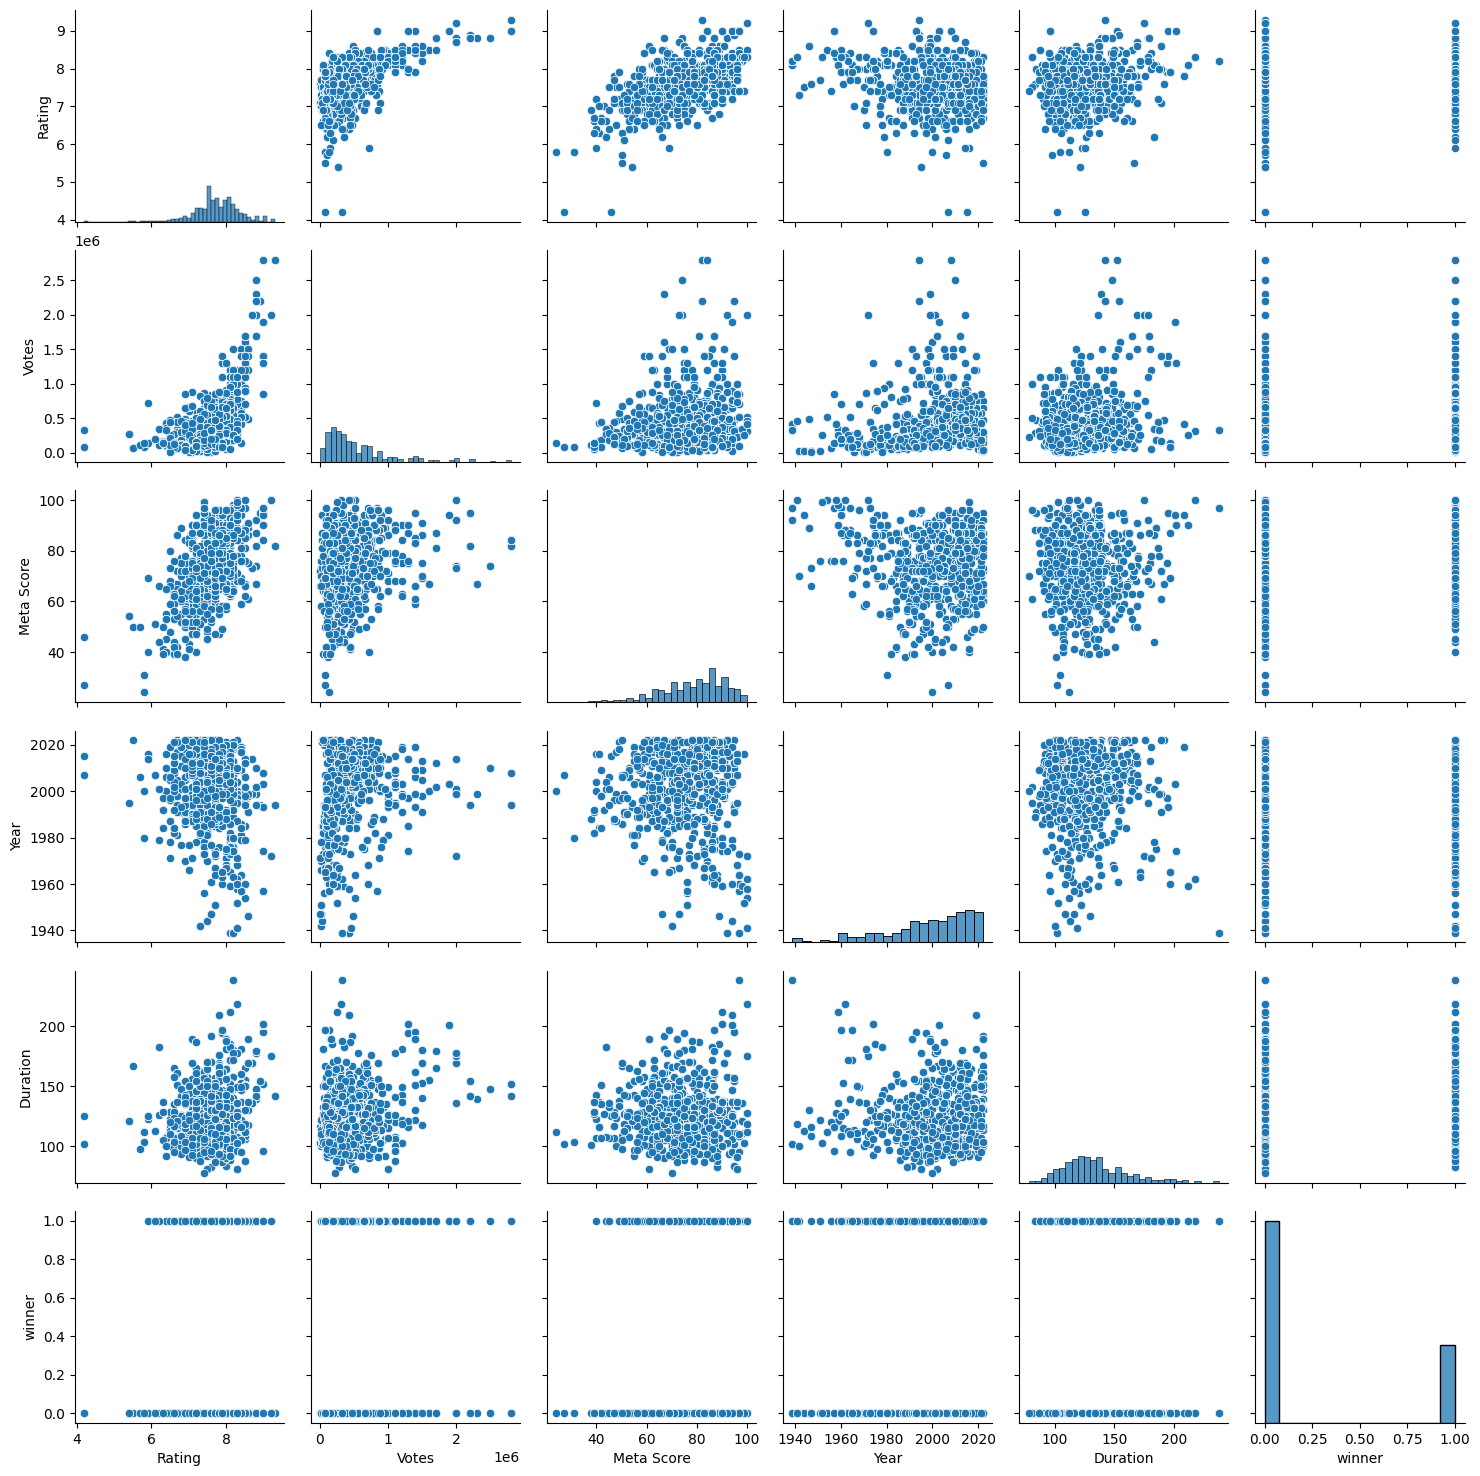

In [ ]:
sns.pairplot(agg_data)

from above,
- winner takes about 30% of all movies in Oscar nominations.

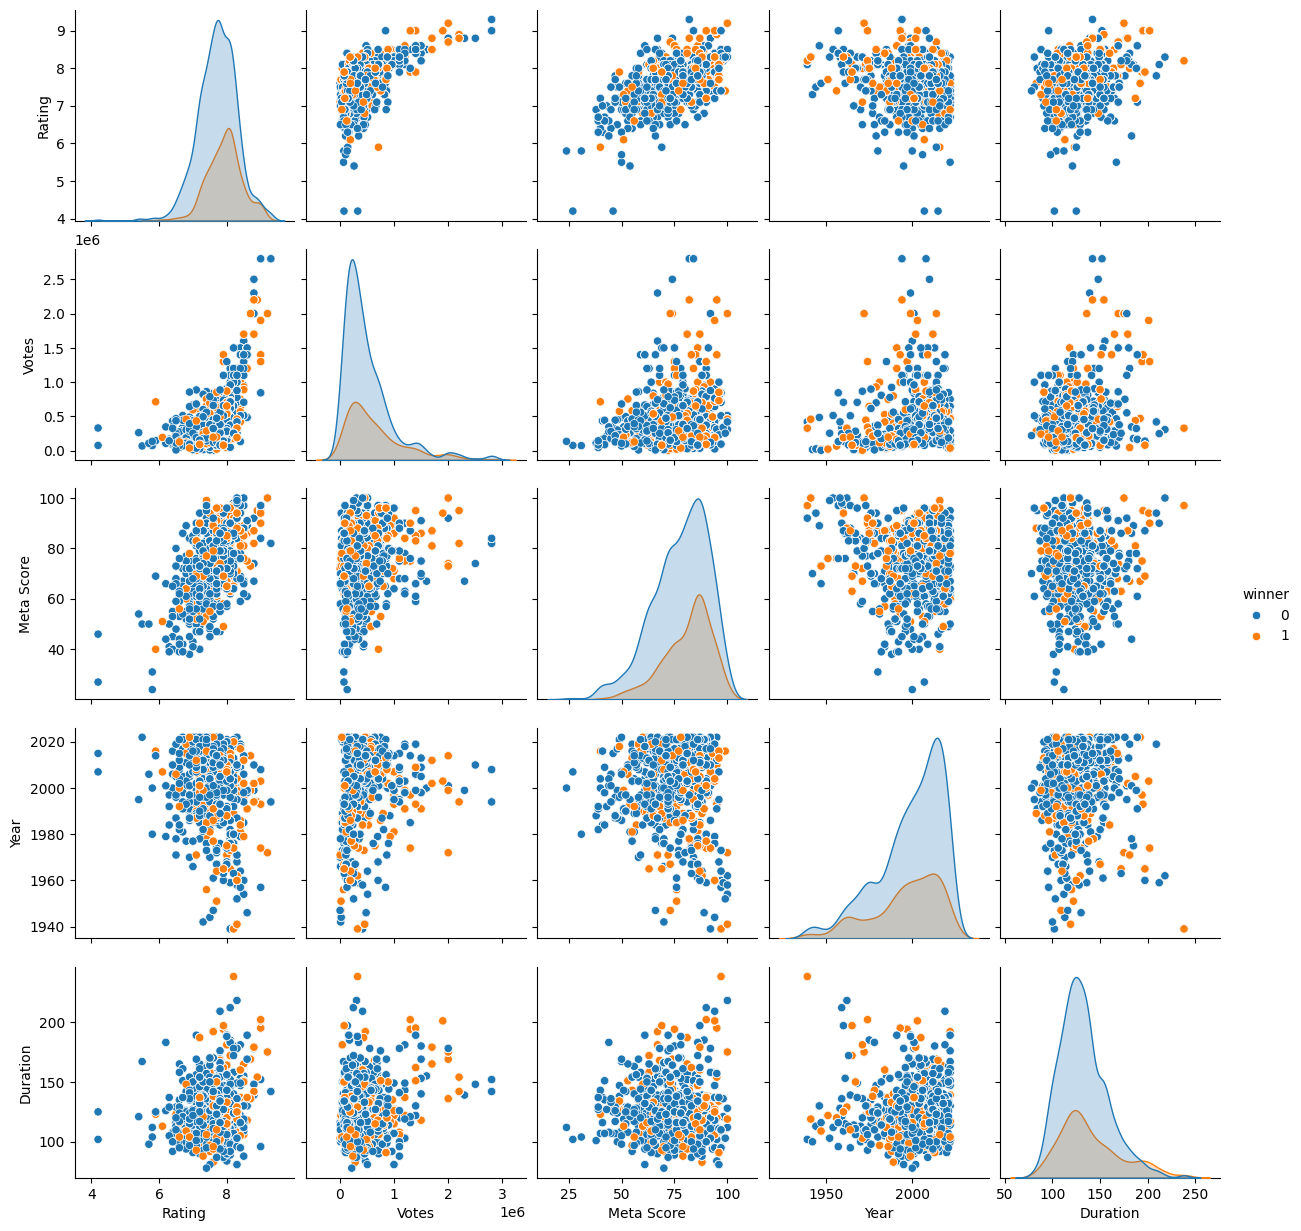

In [ ]:
sns.pairplot(agg_data, hue = 'winner')

From above,
- from Rating vs. Rating(Distrbution of Rating), Oscar winners has a higher mean values of rating than loser does.
- the pure amount of winners of Oscar increases from 1940s to 2020s.
- overall, we see no strong correlation between these atrributes and winners results.

<Axes: >

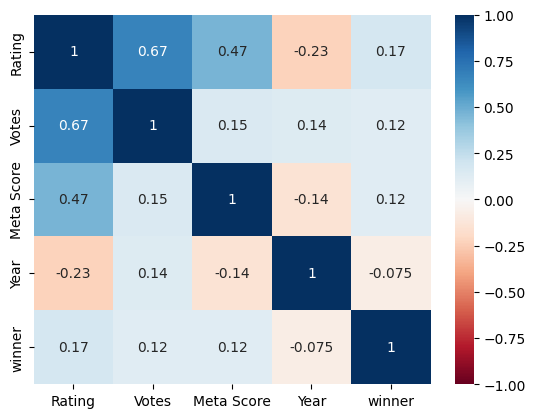

In [ ]:
agg_num = agg_data.drop(columns=['Movie Name','Genre','PG Rating','Duration','Cast','Director','category','name'])
sns.heatmap(agg_num.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap = 'RdBu')

From above we can see among those quantitative variables in the dataset, there are weak correlations between winner results and them. Here we can imply that it is not a good way to only use linaer regression(consider one indepdent variable) to predict the result, applying polynomial regression or consider other categorical variables might works better.

All the attributes we mentioned in visualization are numerical, we didn't put categorical varibales into considerations here. So we might wanna put more effort on exploring the relationship between categorical avriables and winner reuslt in our further analysis.

## Data Preprocessing

In [ ]:
def minMaxScale(data, column):
  mn = min(data[column])
  mx = max(data[column])
  return data[column].apply(lambda x: (x - mn) / (mx - mn))

#one-hot endcoding
# Source: https://stackoverflow.com/questions/45758646/pandas-convert-string-into-list-of-strings
agg_data['Genre'] = agg_data.Genre.apply(lambda x: x.split(", "))

# Source: https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
mlb = MultiLabelBinarizer()

agg_data = agg_data.join(pd.DataFrame(mlb.fit_transform(agg_data.pop("Genre")), columns = mlb.classes_, index = agg_data.index))

agg_data = pd.get_dummies(agg_data, columns=["PG Rating"])
agg_data = agg_data.rename(columns={"PG Rating_Approved":"Approved", "PG Rating_G":"G", "PG Rating_GP":"GP", "PG Rating_NC-17":"NC-17",
       "PG Rating_PG":"PG", "PG Rating_PG-13":"PG-13", "PG Rating_Passed":"Passed", "PG Rating_R":"R",
       "PG Rating_Unrated":"Unrated", "PG Rating_X":"X"})
print(agg_data.columns)

#normalizing data using min-max technique
agg_data["Rating"] = minMaxScale(agg_data, "Rating")
agg_data["Meta Score"] = minMaxScale(agg_data, "Meta Score")
agg_data

Index(['Movie Name', 'Rating', 'Votes', 'Meta Score', 'Year', 'Duration',
       'Cast', 'Director', 'category', 'name', 'winner', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Approved',
       'G', 'GP', 'NC-17', 'PG', 'PG-13', 'Passed', 'R', 'Unrated', 'X'],
      dtype='object')


<ipython-input-98-019faeda8f30>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_data['Genre'] = agg_data.Genre.apply(lambda x: x.split(", "))


,Movie Name,Rating,Votes,Meta Score,Year,Duration,Cast,Director,category,name,...,Approved,G,GP,NC-17,PG,PG-13,Passed,R,Unrated,X
1,Die Hard,0.784314,924000.0,0.631579,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,FILM EDITING,"Frank J. Urioste, John F. Link",...,0,0,0,0,0,0,0,1,0,0
2,Die Hard,0.784314,924000.0,0.631579,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,SOUND,"Don Bassman, Kevin F. Cleary, Richard Overton,...",...,0,0,0,0,0,0,0,1,0,0
3,Die Hard,0.784314,924000.0,0.631579,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,SOUND EFFECTS EDITING,"Stephen H. Flick, Richard Shorr",...,0,0,0,0,0,0,0,1,0,0
4,Die Hard,0.784314,924000.0,0.631579,1988,132,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",John McTiernan,VISUAL EFFECTS,"Richard Edlund, Al DiSarro, Brent Boates, Thai...",...,0,0,0,0,0,0,0,1,0,0
5,The Polar Express,0.470588,233000.0,0.486842,2004,100,"Tom Hanks, Chris Coppola, Michael Jeter, Lesli...",Robert Zemeckis,MUSIC (Original Song),Music and Lyric by Glen Ballard and Alan Silve...,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,Doctor Zhivago,0.725490,81000.0,0.592105,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,MUSIC (Music Score--substantially original),Maurice Jarre,...,0,0,0,0,0,1,0,0,0,0
2509,Doctor Zhivago,0.725490,81000.0,0.592105,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,BEST PICTURE,"Carlo Ponti, Producer",...,0,0,0,0,0,1,0,0,0,0
2510,Doctor Zhivago,0.725490,81000.0,0.592105,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,SOUND,Metro-Goldwyn-Mayer British Studio Sound Depar...,...,0,0,0,0,0,1,0,0,0,0
2511,Doctor Zhivago,0.725490,81000.0,0.592105,1965,197,"Omar Sharif, Julie Christie, Geraldine Chaplin...",David Lean,WRITING (Screenplay--based on material from an...,Robert Bolt,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
agg_data['winner']

1       0
2       0
3       0
4       0
5       0
       ..
2508    1
2509    0
2510    0
2511    1
2513    1
Name: winner, Length: 2212, dtype: int64

## Data Splitting

In [ ]:
X = agg_data.drop(['winner', 'Movie Name', 'Cast', 'Director', 'category', 'name'], axis = 1)
Y = agg_data['winner']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 21)

In [ ]:
X_train

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,Approved,G,GP,NC-17,PG,PG-13,Passed,R,Unrated,X
615,0.745098,645000.0,0.921053,2016,128,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1260,0.705882,685000.0,0.605263,2008,166,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
963,0.764706,577000.0,0.618421,2016,139,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
112,0.980392,2000000.0,1.000000,1972,175,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
628,0.764706,253000.0,0.513158,1965,172,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,0.490196,445000.0,0.236842,1998,151,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
80,0.705882,495000.0,0.750000,2022,139,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
863,0.764706,869000.0,0.842105,2014,99,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2102,0.764706,250000.0,0.868421,1959,212,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Model 1: Linear Regression

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
# train_x = X_train.to_numpy()
# train_ytrue = y_train

# linear_model = sklearn.linear_model.LinearRegression()
# linear_model.fit(train_x, train_ytrue)

reg = LinearRegression()
regmodel = reg.fit(X_train, y_train)

In [ ]:
train_yhat = reg.predict(X_train)
train_yhat = [ 1 if y>=0.5 else 0 for y in train_yhat ]
print(train_yhat)


test_yhat = reg.predict(X_test)
test_yhat = [ 1 if y>=0.5 else 0 for y in test_yhat ]
print(test_yhat)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, train_yhat))
print(classification_report(y_test, test_yhat))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84      1346
           1       0.61      0.10      0.17       534

    accuracy                           0.73      1880
   macro avg       0.67      0.54      0.50      1880
weighted avg       0.70      0.73      0.65      1880

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       249
           1       0.47      0.11      0.18        83

    accuracy                           0.75       332
   macro avg       0.62      0.53      0.51       332
weighted avg       0.69      0.75      0.68       332



In [ ]:
from sklearn.metrics import mean_squared_error
mseTrain = mean_squared_error(y_train,train_yhat)
mseTest = mean_squared_error(y_test,test_yhat)

print(mseTrain,mseTest)

0.27393617021276595 0.25301204819277107


The difference in mse between train and test isn't large so there's no sign of overfitting.

***What are the next 2 models you are thinking of and why?***

2nd model: logistic regression model because it uses a sigmoid function

3rd model: gradient descent with relu + softmax activation function because it is another great activation for this classification task, and we wanted to try out different activation functions.

***Conclusion section: What is the conclusion of your 1st model? What can be done to possibly improve it?***

The model was not very accurate (accuracy around 0.75 for testing dataset and 0.73 for training dataset).

We could add an epsilon to shift the linear regression line for better accuracy. However, we think using other models that are more suitable for classification might be a better approach to this task.

## Model 2: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
train_yhat = logreg.predict(X_train)
train_yhat = [ 1 if y>=0.5 else 0 for y in train_yhat ]
print(train_yhat)


test_yhat = logreg.predict(X_test)
test_yhat = [ 1 if y>=0.5 else 0 for y in test_yhat ]
print(test_yhat)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(classification_report(y_train, train_yhat))
print(classification_report(y_test, test_yhat))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      1346
           1       0.26      0.01      0.02       534

    accuracy                           0.71      1880
   macro avg       0.49      0.50      0.42      1880
weighted avg       0.59      0.71      0.60      1880

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       249
           1       0.20      0.01      0.02        83

    accuracy                           0.74       332
   macro avg       0.47      0.50      0.44       332
weighted avg       0.61      0.74      0.64       332



In [ ]:
mseTrain = mean_squared_error(y_train, train_yhat)
mseTest = mean_squared_error(y_test, test_yhat)

print(mseTrain, mseTest)

0.28882978723404257 0.25903614457831325


## Model 3: Neural Network

In [ ]:
# neural network code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential()

ACTIVATIONFXN = 'relu'

nn_model.add(Dense(units = 64, activation = ACTIVATIONFXN, input_dim = X_train.shape[1]))
nn_model.add(Dense(units = 64, activation = ACTIVATIONFXN))
nn_model.add(Dense(units = 64, activation = ACTIVATIONFXN))
nn_model.add(Dense(units = 64, activation = ACTIVATIONFXN))
nn_model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
nn_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = nn_model.fit(X_train.astype('float'), y_train, batch_size = 5, epochs = 20, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/20
376/376 [==============================] - 2s 3ms/step - loss: 915.5900 - accuracy: 0.5436 - val_loss: 189.0168 - val_accuracy: 0.7500
Epoch 2/20
376/376 [==============================] - 1s 2ms/step - loss: 157.9345 - accuracy: 0.5670 - val_loss: 50.6391 - val_accuracy: 0.7500
Epoch 3/20
376/376 [==============================] - 1s 2ms/step - loss: 76.6787 - accuracy: 0.5585 - val_loss: 25.0522 - val_accuracy: 0.7500
Epoch 4/20
376/376 [==============================] - 1s 2ms/step - loss: 40.6033 - accuracy: 0.5766 - val_loss: 93.7138 - val_accuracy: 0.7500
Epoch 5/20
376/376 [==============================] - 1s 2ms/step - loss: 23.5765 - accuracy: 0.6420 - val_loss: 0.5755 - val_accuracy: 0.7500
Epoch 6/20
376/376 [==============================] - 1s 2ms/step - loss: 1.6083 - accuracy: 0.7133 - val_loss: 0.5642 - val_accuracy: 0.7500
Epoch 7/20
376/376 [==============================] - 1s 2ms/step - loss: 0.6063 - accuracy: 0.7165 - val_loss: 0.5657 - val_accuracy: 0

#### Evaluate your model compare training vs test error

In [ ]:
print("accuracy of training data: " + str(history.history['accuracy']))
print("loss of training data: " + str(history.history['loss']))

print("\n" + "_________dividing line______________" + "\n")

print("accuracy of validation data: " + str(history.history['val_accuracy']))
print("loss of validation data: " + str(history.history['val_loss']))

accuracy of training data: [0.5436170101165771, 0.5670212507247925, 0.5585106611251831, 0.5765957236289978, 0.6420212984085083, 0.7132978439331055, 0.7164893746376038, 0.7170212864875793, 0.7132978439331055, 0.7159574627876282, 0.7159574627876282, 0.7159574627876282, 0.7159574627876282, 0.7159574627876282, 0.7159574627876282, 0.7159574627876282, 0.7159574627876282, 0.7159574627876282, 0.7159574627876282, 0.7159574627876282]
loss of training data: [915.5900268554688, 157.93453979492188, 76.67872619628906, 40.60332489013672, 23.57649803161621, 1.6083343029022217, 0.606281042098999, 0.7817983627319336, 0.6725761890411377, 1.608016848564148, 0.6472180485725403, 0.5977427959442139, 0.5972881317138672, 0.597802460193634, 0.5976834297180176, 0.5977929830551147, 0.5974118709564209, 0.5974735617637634, 0.5979422926902771, 0.5972217321395874]

_________dividing line______________

accuracy of validation data: [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.

#### Where does your model fit in the fitting graph, how does it compare to your first model?

<Axes: >

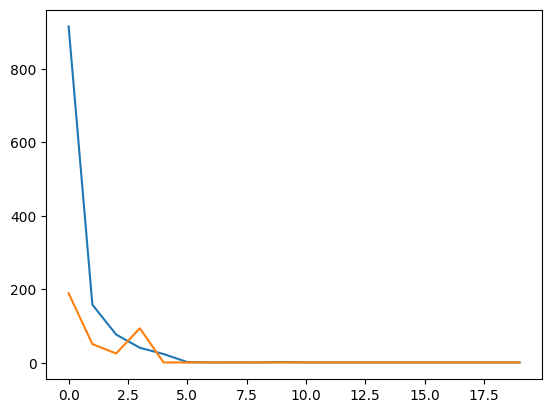

In [ ]:
# fitting graph
import seaborn as sns
sns.lineplot(data = history.history['loss'])
sns.lineplot(data = history.history['val_loss'] )
# blue is accuracy
# orange is val_accuracy

The third model showed a slightly lower accuracy than the first two models.

#### Did you perform hyper parameter tuning? K-fold Cross validation? Feature expansion? What were the results?

We've tried different activation functions (all relu, relu + softmax, relu + sigmoid) as well as different numbers of layers and the number of nodes in each of them, and the model we have right now with 5 layers and with relu + sigmoid gave us the best accuracy.

relu + softmax and all relu gave only about 20% accuracy.

#### Conclusion section: What is the conclusion of your 3rd model? What can be done to possibly improve it?


In [ ]:
dist_of_oscar_winner = sum(y_test) / len(y_test)
dist_of_oscar_winner

0.25

In [ ]:
test_yhat = nn_model.predict(X_test.astype(float))
test_yhat = [ 1 if y>=0.5 else 0 for y in test_yhat ]
print(test_yhat)

11/11 [==============================] - 0s 2ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Something we've noticed was that our neural network predicted all 0s. This is basically saying that this whole thing is by random, and that the around 75% accuracy was because there were only 25% of winners in the test data set, and if we predicted all 0s then the accuracy would of course be 75% because 75% of the movies didn't win the oscar.

That being said, our model really wasn't predicting anything, and there isn't something we can do to improve it. In conlcusion, We can see that there might not be any sort of patterns the model was able to learn and predict what kinds of movies would win the Oscar.